# 다항 회귀와 과(대)적합/과소적합 이해

## 다항 회귀 이해

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공X

-> 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용

PolynomialFeatures 클래스를 통해 feature를 Polynomial(다항식) feature로 변환

$ 단항값[x1, x2] -> 2차 다항값[1, x1, x2, x1^{2}, x1x2, x2^{2}] $

In [97]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0. 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피쳐 : \n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피쳐 : \n', poly_ftr)

일차 단항식 계수 피쳐 : 
 [[0 1]
 [2 3]]


PolynomialFeatures()

변환된 2차 다항식 계수 피쳐 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측

$ y = 1 + 2x_1 + 3x^{2}_1 + 4x^{3}_2 $

In [102]:
def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0] ** 2 + 4 * X[:, 1] ** 3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [103]:
# 일차 단항식 계수를 삼차 다항식 계수로 변환, 이를 선형 회귀에 적용하면 다항 회귀로 구현
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature : \n', poly_ftr)\

# linear Regression에 3차 다항식 계수feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape : ', model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


LinearRegression()

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape :  (10,)


=> LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어난다

In [104]:
# pipline을 이용

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# 3차 다항식으로
def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0] ** 2 + 4 * X[:, 1] ** 3
    return y

# pipeline 객체로 streamline하게 polynomial feature 변환과 linear regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

원래 데이터 세트는 featurex와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 갖도록

다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 임의의 값으로 구성된 X값에 대한 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

<Figure size 1400x500 with 0 Axes>

[]

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])


Degree 1 회귀 계수는 [-1.61]입니다

Degree 1 MSE는 0.40772896250986834입니다


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(0.0, 1.0)

(-2.0, 2.0)

Text(0.5, 1.0, 'Degree 1\nMSE = 4.08e-01(+/-4.25e-01)')

[]

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])


Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다

Degree 4 MSE는 0.04320874987231747입니다


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(0.0, 1.0)

(-2.0, 2.0)

Text(0.5, 1.0, 'Degree 4\nMSE = 4.32e-02(+/-7.08e-02)')

[]

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])


Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]입니다

Degree 15 MSE는 182815433.47648773입니다


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(0.0, 1.0)

(-2.0, 2.0)

Text(0.5, 1.0, 'Degree 15\nMSE = 1.83e+08(+/-5.48e+08)')

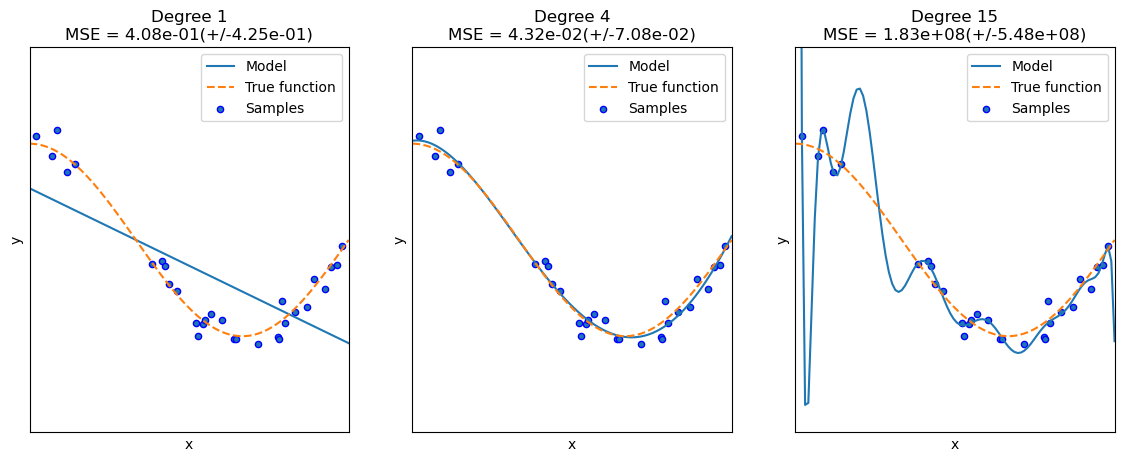

In [8]:
# 다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능 평가

plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())
    
    # 개별 degree별 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)# 1차 4차, 15차인 다항회귀로 변경
    linear_regression = LinearRegression() # 모델 생성
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)]) # 파이프라인으로 묶기
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = 'neg_mean_squared_error', cv = 10)
    # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {} 회귀 계수는 {}입니다'.format(degrees[i], np.round(coefficients, 2)))
    print('\nDegree {} MSE는 {}입니다'.format(degrees[i], -1 * np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나뉘 예측을 수행
    # 데트스 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model');
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = 'True function');
    plt.scatter(X, y, edgecolors = 'b', s = 20, label = 'Samples');
    
    plt.xlabel('x');
    plt.ylabel('y');
    plt.xlim((0, 1));
    plt.ylim((-2, 2));
    plt.legend(loc = 'best');
    plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))